# OrionKL test with method 1

In [89]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/martin/anaconda3/lib/python3.6/site-packages/spectral_cube/cube_utils.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stokes_arrays[stokes_names[i_stokes]] = array[array_slice]


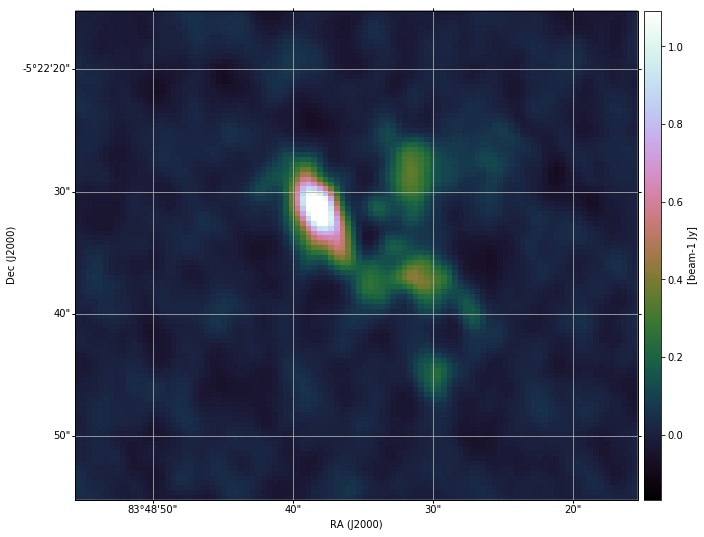

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu,spec = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"], save_path="./orion_12CO_mom0.png")

In [3]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=0.10237737624469602, description='back_level', max=0.20475475248939204…

[INFO] Number of pixels with significant emission: 831

Isolated Cloud Entity A: 54 pixels of significant emission.
Isolated Cloud Entity B: 535 pixels of significant emission.
Isolated Cloud Entity C: 216 pixels of significant emission.
Isolated Cloud Entity D: 26 pixels of significant emission.


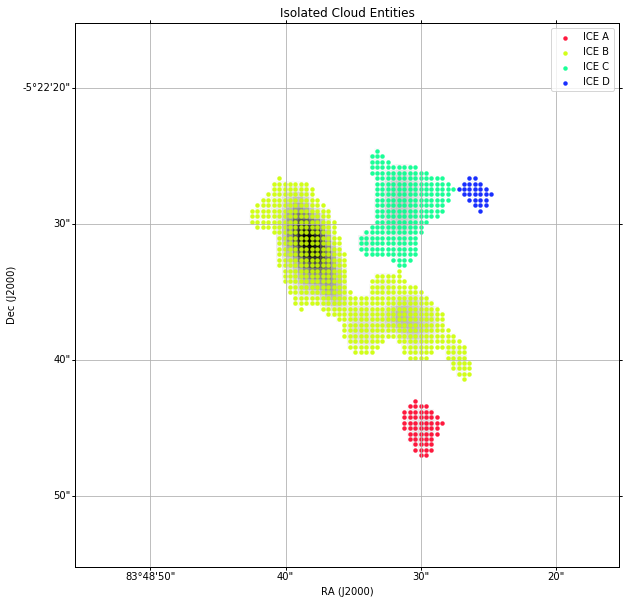

####################################################################################################


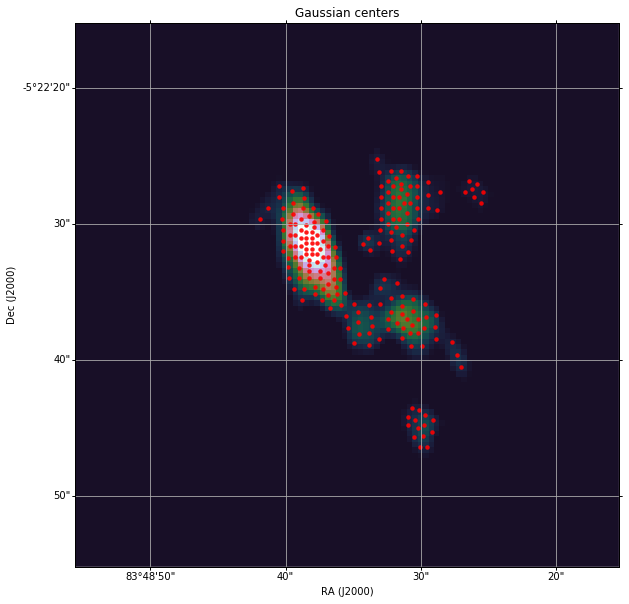

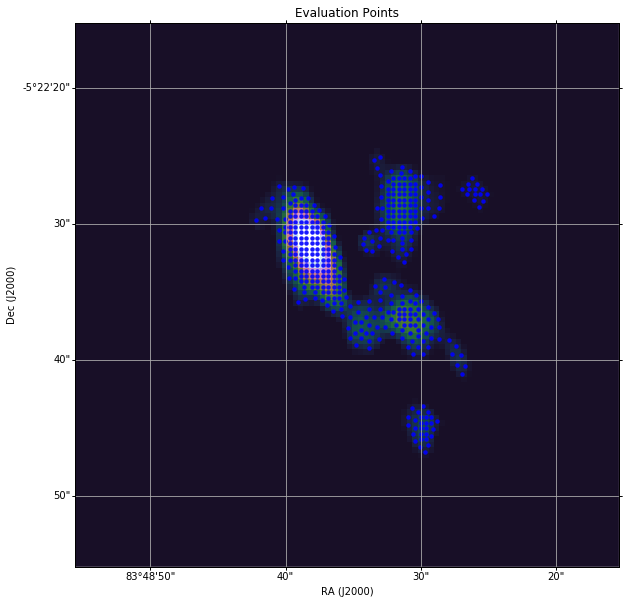

In [4]:
hdmc = HDMClouds(data, back_level=0.078, wcs=wcs, verbose=True, compression=0.25)

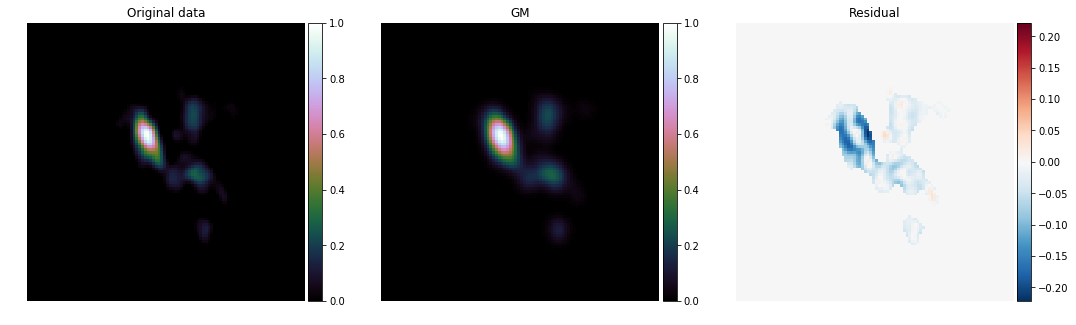

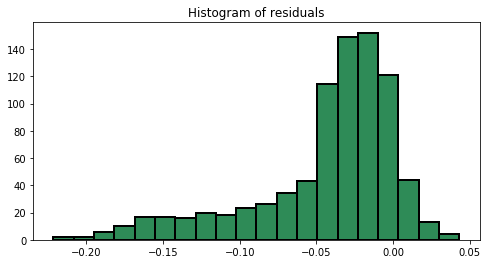

RESIDUAL STATS
RMS of residual: 0.018468252029022622
Inf norm of residual: 0.22148212248479127
Variance of residual: 0.00032800537655363737
Normalized flux addition: 0.3105533511885407
Normalized flux lost: 0.006907182644690327


In [5]:
hdmc.get_residual_stats();

In [6]:
%%prun -s tottime -q -l 30 -T hdmc_m1.prof
hdmc.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.011855710256712053
Inf norm of residual: 0.0353161931173588
Variance of residual: 0.00011202025181605118
Normalized flux addition: 0.13111030463887657
Normalized flux lost: 0.03455201910148848


---------------------------------------------
Building GM for Isolated Cloud Entity B
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01622686978675515
Inf norm of residual: 0.06039164334304206
Variance of residual: 0.0002342357117974017
Normalized flux addition: 0.04716736755453374
Normalized flux lost: 0.018018774422273034


---------------------------------------------
Building GM for Isolated Cloud Entity C
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.008806185602227743
Inf norm of residual: 0.03239907561335924
Variance of residual: 6.849762174857936e-05
Normali

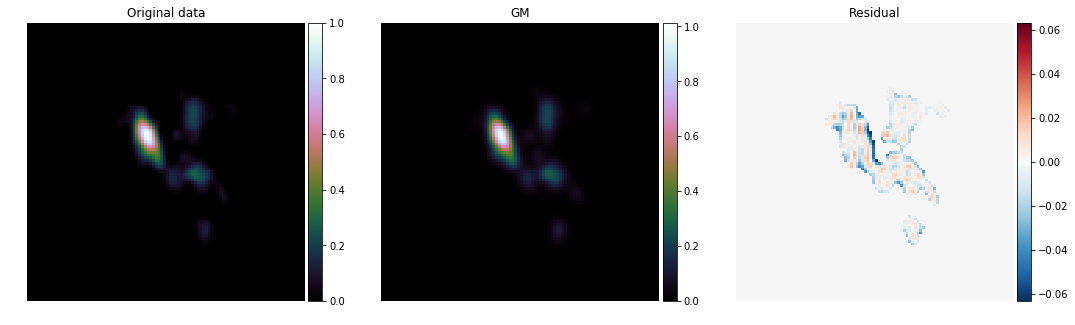

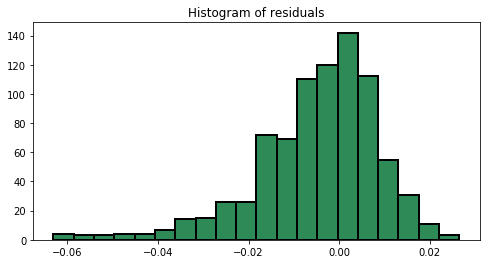

RESIDUAL STATS
RMS of residual: 0.004152384223833277
Inf norm of residual: 0.06305864436029655
Variance of residual: 1.7080894474173873e-05
Normalized flux addition: 0.05287948506727072
Normalized flux lost: 0.019137840398745297


In [7]:
hdmc.get_residual_stats();

In [8]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 48.19772171974182


In [9]:
w,sig = hdmc.get_params()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.2749774127649416
sig variation:  0.01562689087562993


#### Profiling results

In [10]:
print(open('hdmc_m1.prof', 'r').read())

         5599022 function calls (5596810 primitive calls) in 48.198 seconds

   Ordered by: internal time
   List reduced from 203 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    81058   29.984    0.000   29.984    0.000 {fgm_eval.gm_eval2d_2}
   243162    4.218    0.000    8.607    0.000 necompiler.py:749(evaluate)
        4    3.818    0.954   48.184   12.046 {built-in method scipy.optimize._minpack._lmdif}
    81054    2.611    0.000    4.967    0.000 hdmclouds_v1.py:43(d1psi1)
    81062    1.574    0.000    1.574    0.000 utils.py:149(sig_mapping)
    81054    1.404    0.000   44.372    0.001 hdmclouds_v1.py:887(F)
   243165    1.180    0.000    1.509    0.000 necompiler.py:535(getContext)
   243162    1.036    0.000    1.703    0.000 necompiler.py:724(getArguments)
   243165    0.387    0.000    0.387    0.000 {built-in method builtins.sorted}
   486360    0.358    0.000    0.358    0.000 {built-in method numpy.core.multia

***

### Building the hierarchical tree

In [11]:
hdmc.build_hierarchical_tree()

Building the hierarchical tree for Isolated Cloud Entity A
DONE

Building the hierarchical tree for Isolated Cloud Entity B
DONE

Building the hierarchical tree for Isolated Cloud Entity C
DONE

Building the hierarchical tree for Isolated Cloud Entity D
DONE



In [20]:
hdmc.visualize()

interactive(children=(Text(value='', description='split'), Text(value='', description='join1'), Text(value='',…

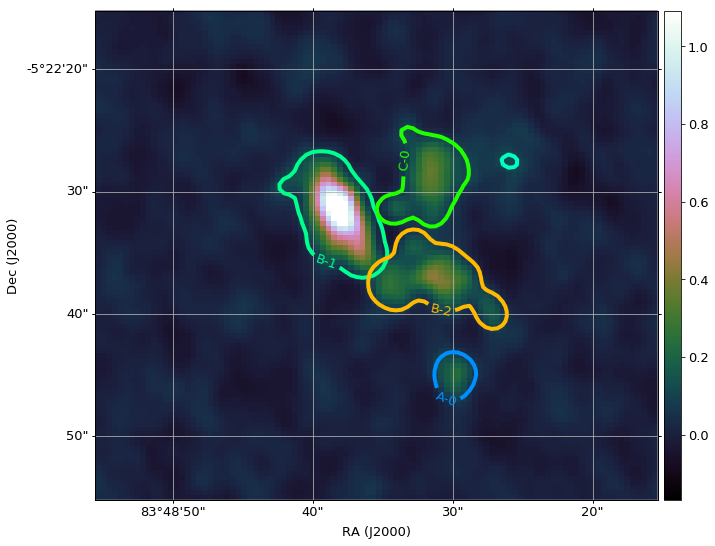

In [127]:
gp.ce_plot(hdmc, wcs=hdmc.wcs)

In [21]:
hdmc.compute_stats()

,Flux [Jy/Beam],Centroid Position,Centroid Position (ra-dec) [deg]
A-0,2.553549,"(0.25642992282199956, 0.6393462300840633)","(83.8125657537953, -5.37489614673424)"
B-1,86.000003,"(0.5849957513169202, 0.4339450696214322)","(83.80889889623643, -5.377178387466592)"
B-2,13.303998,"(0.4527963487514189, 0.5981267686000062)","(83.81037426932004, -5.375354146739297)"
C-0,15.568391,"(0.6626177587501095, 0.5979070071791625)","(83.8080326225777, -5.375356586290221)"
D-0,0.329211,"(0.6903420240211399, 0.7355856911445945)","(83.8077232197128, -5.373826822170189)"


***

## Comparison with `clumpfind` and `fellwalker`

In [124]:
from pycupid import clumpfind,fellwalker


def compute_caa_stats(data, caa, wcs):
    stats = {}

    for i in range(caa.min()+1, caa.max()+1):
        values = data[caa==i]
        xpos,ypos = np.where(caa==i)

        flux = np.sum(values)
        x_centroid = np.sum(xpos*values)/np.sum(values)
        y_centroid = np.sum(ypos*values)/np.sum(values)

        wx_centroid,wy_centroid = wcs.wcs_pix2world(x_centroid,y_centroid,0)

        stats["CE {0}".format(i)] = (flux, (x_centroid,y_centroid), (wx_centroid,wy_centroid))


    stats = pd.DataFrame.from_dict(stats, orient="index", columns=["Flux [Jy/Beam]", "Centroid Position [pix]", "Centroid Position (ra-dec) [deg]"])   

    display(stats)
    return stats


def caa_show(data, caa, save_path=None, wcs=None):
    bd_map = boundary_map_caa(caa).T
    colors = plt.cm.rainbow(np.linspace(0., 1., caa.max()))
    
    cmap = plt.cm.gray_r
    norm = plt.Normalize(data.min(), data.max())
    rgba = cmap(norm(data))
    
    m,n = data.shape
    for i in range(m):
        for j in range(n):
            if bd_map[i,j]==0: continue
            rgba[i,j,:] = colors[bd_map[i,j]-1]

    patches = []
    for i,color in enumerate(colors):
        colors[bd_map[i,j]-1]
        patches.append(mpatches.Patch(color=color, label='CE {0}'.format(i+1)))

    fig = plt.figure(figsize=(8,8))
    if wcs is not None: fig.gca(projection=wcs)
    im = plt.imshow(rgba)
    plt.grid()
    if wcs is not None:
        plt.xlabel(umap[wcs.axis_type_names[0]])
        plt.ylabel(umap[wcs.axis_type_names[1]])
    else:
        plt.tick_params(labelbottom=False, labelleft=False)
    ax = plt.gca()
    ax.invert_yaxis()
    if save_path is not None:
        plt.savefig(save_path, format='eps', dpi=150, bbox_inches='tight')
    #if wcs is not None:
        #cbar = plt.colorbar(im, ax=ax, pad=0.01, aspect=30)
    ax.set_aspect('auto')
    plt.legend(handles=patches)
    plt.show()

***
### `clumpfind`

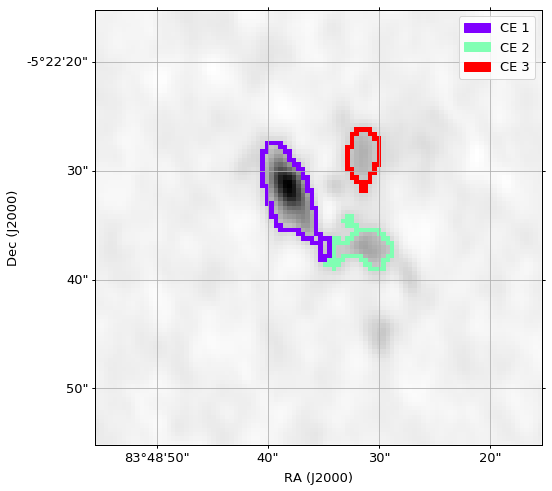

In [125]:
#out_cf = clumpfind(data, 0.5*base_level)
out_cf = clumpfind(data, 0.078)
out_cf[out_cf==out_cf.min()] = 0.

caa_show(data, out_cf, wcs=wcs)

In [126]:
compute_caa_stats(data, out_cf, wcs);

,Flux [Jy/Beam],Centroid Position [pix],Centroid Position (ra-dec) [deg]
CE 1,47.263725,"(45.102418348646694, 55.110800500659856)","(83.81033824649124, -5.375821021923468)"
CE 2,63.512123,"(58.75269896603537, 43.558794516594915)","(83.80881484605455, -5.377104577610403)"
CE 3,5.147349,"(60.02130581784532, 62.89499710792854)","(83.80867327066305, -5.374956110414155)"


***
### `Fellwalker`

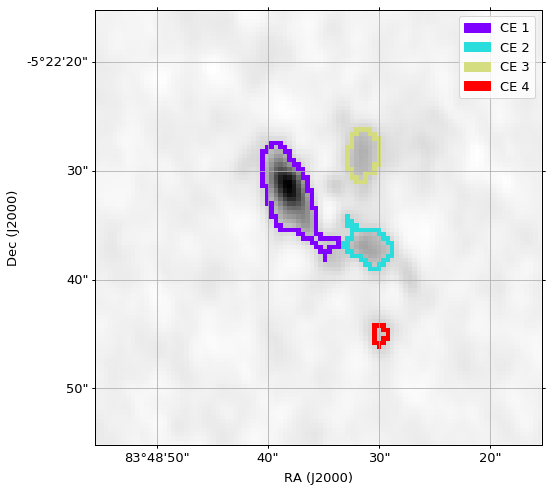

In [121]:
#out_fw = fellwalker(data, 0.5*base_level)
out_fw = fellwalker(data, 0.078)
out_fw[out_fw==out_fw.min()] = 0.

caa_show(data, out_fw, wcs=wcs)

In [122]:
compute_caa_stats(data, out_fw, wcs);

,Flux [Jy/Beam],Centroid Position [pix],Centroid Position (ra-dec) [deg]
CE 1,50.195412,"(45.665768954545506, 54.56304219068273)","(83.81027537549518, -5.375881884010656)"
CE 2,49.184555,"(60.03908211413193, 43.62341974234582)","(83.80867128285561, -5.3770973967846585)"
CE 3,4.008535,"(59.995116623768396, 63.916111878214366)","(83.80867619363268, -5.374842653222719)"
CE 4,-0.134510,"(64.38228471820102, 23.446268155351156)","(83.80818656590594, -5.379339301442377)"


***